In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
# Load the preference data
preference_data = pd.read_csv("C:/Users/Rohit Srivastava/OneDrive/Desktop/ISB/Sixth Term/Assignments/MA/Individual Assignments/1/mugs-preference-parameters-full.csv")

preference_data

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,...,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,...,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,...,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,...,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,...,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,3,7,1,6,7,1,7,6,...,7,4,1,7,54,13,6,10,7,10
307,308,1,3,7,1,6,7,1,7,6,...,7,7,1,4,8,24,4,39,15,11
308,309,1,6,7,1,5,7,1,7,3,...,7,7,3,1,12,34,16,14,13,11
309,310,1,3,7,1,5,7,1,7,1,...,7,1,5,7,57,5,5,17,5,10


In [3]:
preference_data.columns

Index(['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12',
       'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk',
       'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'],
      dtype='object')

In [4]:
# Define the attributes and their levels
attributes = {
    "Price": [30, 10, 5],
    "Time_Insulated": [0.5, 1, 3],
    "Capacity": [12, 20, 32],
    "Cleanability": [7, 5, 2],  # Minutes, lower is better
    "Containment": ["Slosh_resistant", "Spill_resistant", "Leak_resistant"],
}

# Generate all possible combinations of the product attributes
product_combinations = list(itertools.product(
    attributes['Price'],
    attributes['Time_Insulated'],
    attributes['Capacity'],
    attributes['Cleanability'],
    attributes['Containment'],
))

In [5]:
# Convert the combinations to a DataFrame
product_combinations_df = pd.DataFrame(product_combinations, columns=attributes.keys())

# Reset the index to add an index column starting from 0
product_combinations_df.reset_index(inplace=True)

# Adjust the index to start from 1 instead of 0
product_combinations_df['index'] = product_combinations_df['index'] + 1

product_combinations_df.rename(columns={'index': 'Index'}, inplace=True)

# Save to CSV with the new index column
product_combinations_df.to_csv("product_combinations.csv", index=False)

product_combinations_df

,Index,Price,Time_Insulated,Capacity,Cleanability,Containment
0,1,30,0.5,12,7,Slosh_resistant
1,2,30,0.5,12,7,Spill_resistant
2,3,30,0.5,12,7,Leak_resistant
3,4,30,0.5,12,5,Slosh_resistant
4,5,30,0.5,12,5,Spill_resistant
...,...,...,...,...,...,...
238,239,5,3.0,32,5,Spill_resistant
239,240,5,3.0,32,5,Leak_resistant
240,241,5,3.0,32,2,Slosh_resistant
241,242,5,3.0,32,2,Spill_resistant


In [6]:
product_combinations_df.columns

Index(['Index', 'Price', 'Time_Insulated', 'Capacity', 'Cleanability',
       'Containment'],
      dtype='object')

In [7]:
# Define the cost structure
cost_structure = {
    "Time_Insulated": [0.5, 1, 3],
    "Capacity": [1.0, 2.6, 2.8],
    "Cleanability": [1, 2.2, 3.0],
    "Containment": [0.5, 0.8, 1]
}

## Calculating utiltities, probabilities, exponential treatment and market share

In [8]:
# Define a list of product attribute combinations
products_attributes = [
    {'Price': 30, 'Time_Insulated': 3, 'Capacity': 20, 'Cleanability': 'E', 'Containment': 'Lk', 'Brand': 'A'},
    {'Price': 10, 'Time_Insulated': 1, 'Capacity': 20, 'Cleanability': 'F', 'Containment': 'Sp', 'Brand': 'B'}
]

# Function to calculate utility for a given customer and product attributes
def calculate_utility(customer, product_attrs):
    utility = 0
    utility += customer[f'pPr{product_attrs["Price"]}'] * customer['IPr']
    utility += customer[f'pIn{product_attrs["Time_Insulated"]}'] * customer['Iin']
    utility += customer[f'pCp{product_attrs["Capacity"]}'] * customer['ICp']
    utility += customer[f'pCl{product_attrs["Cleanability"]}'] * customer['ICl']
    utility += customer[f'pCn{product_attrs["Containment"]}'] * customer['Icn']
    utility += customer[f'pBr{product_attrs["Brand"]}'] * customer['IBr']
    return utility

# Calculate utilities for each customer
all_utilities = []
for i, customer in preference_data.iterrows():
    utilities = [customer['Cust']]
    for product_attrs in products_attributes:
        utility = calculate_utility(customer, product_attrs)
        utilities.append(utility)
    all_utilities.append(utilities)

# Create DataFrame from calculated utilities
utility_columns = ['Cust'] + [f'Utility_{i+1}' for i in range(len(products_attributes))]
all_utilities_df = pd.DataFrame(all_utilities, columns=utility_columns)

all_utilities_df

,Cust,Utility_1,Utility_2
0,1,670,517
1,2,678,659
2,3,287,501
3,4,610,427
4,5,327,419
...,...,...,...
306,307,346,397
307,308,659,471
308,309,628,454
309,310,291,369


In [9]:
# Convert product_combinations to a DataFrame
product_combinations_df = pd.DataFrame(product_combinations, columns=['Price', 'Time_Insulated', 'Capacity', 'Cleanability', 'Containment'])

# Convert the 'Price', 'Time_Insulated', and 'Capacity' columns to appropriate numerical formats
product_combinations_df['Price'] = product_combinations_df['Price'].astype(int)
product_combinations_df['Time_Insulated'] = product_combinations_df['Time_Insulated'].astype(float)
product_combinations_df['Capacity'] = product_combinations_df['Capacity'].astype(int)

# Now, product_combinations_df is correctly formatted for further analysis
product_combinations_df

,Price,Time_Insulated,Capacity,Cleanability,Containment
0,30,0.5,12,7,Slosh_resistant
1,30,0.5,12,7,Spill_resistant
2,30,0.5,12,7,Leak_resistant
3,30,0.5,12,5,Slosh_resistant
4,30,0.5,12,5,Spill_resistant
...,...,...,...,...,...
238,5,3.0,32,5,Spill_resistant
239,5,3.0,32,5,Leak_resistant
240,5,3.0,32,2,Slosh_resistant
241,5,3.0,32,2,Spill_resistant


In [10]:
print(preference_data.columns)

Index(['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12',
       'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk',
       'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'],
      dtype='object')


In [11]:
def get_column_name(attr, value):
    if attr == 'Price':
        return f'pPr{value:02}'
    elif attr == 'Time_Insulated':
        return 'pIn0.5' if value == 0.5 else f'pIn{int(value)}'
    elif attr == 'Capacity':
        return f'pCp{int(value)}'
    elif attr == 'Cleanability':
        return f'pCl{"D" if value == 7 else "F" if value == 5 else "E"}'
    elif attr == 'Containment':
        return f'pCn{"Sl" if value == "Slosh_resistant" else "Sp" if value == "Spill_resistant" else "Lk"}'

for index, product in product_combinations_df.iterrows():
    utility_column = f'Utility_Prod_{index + 1}'
    all_utilities_df[utility_column] = preference_data.apply(lambda row: 
        row[get_column_name('Price', product['Price'])] * row['IPr'] +
        row[get_column_name('Time_Insulated', product['Time_Insulated'])] * row['Iin'] +
        row[get_column_name('Capacity', product['Capacity'])] * row['ICp'] +
        row[get_column_name('Cleanability', product['Cleanability'])] * row['ICl'] +
        row[get_column_name('Containment', product['Containment'])] * row['Icn'] +
        row['pBrC'] * row['IBr'],  # Directly applying 'Brand C' preference
        axis=1)

C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\3737800003.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_utilities_df[utility_column] = preference_data.apply(lambda row:
C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\3737800003.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_utilities_df[utility_column] = preference_data.apply(lambda row:
C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\3737800003.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [12]:
all_utilities_df

,Cust,Utility_1,Utility_2,Utility_Prod_1,Utility_Prod_2,Utility_Prod_3,Utility_Prod_4,Utility_Prod_5,Utility_Prod_6,Utility_Prod_7,...,Utility_Prod_234,Utility_Prod_235,Utility_Prod_236,Utility_Prod_237,Utility_Prod_238,Utility_Prod_239,Utility_Prod_240,Utility_Prod_241,Utility_Prod_242,Utility_Prod_243
0,1,670,517,100,236,304,107,243,311,142,...,616,338,474,542,345,481,549,380,516,584
1,2,678,659,102,408,408,152,458,458,162,...,624,241,547,547,291,597,597,301,607,607
2,3,287,501,182,246,278,198,262,294,230,...,671,512,576,608,528,592,624,560,624,656
3,4,610,427,182,262,302,342,422,462,422,...,650,296,376,416,456,536,576,536,616,656
4,5,327,419,167,167,167,185,185,185,221,...,707,558,558,558,576,576,576,612,612,612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,346,397,160,188,202,220,248,262,220,...,700,592,620,634,652,680,694,652,680,694
307,308,659,471,134,149,224,329,344,419,368,...,674,346,361,436,541,556,631,580,595,670
308,309,628,454,100,126,178,114,140,192,184,...,634,408,434,486,422,448,500,492,518,570
309,310,291,369,159,174,189,210,225,240,261,...,693,531,546,561,582,597,612,633,648,663


In [13]:
# Exporting DataFrame to a CSV file
#all_utilities_df.to_csv('all_utilities_df.csv', index=False)

In [14]:
# Exponential transformation
const_multiplier = 0.0139

# Copy the DataFrame to avoid modifying the original
exp_utilities = all_utilities_df.copy()

# Identify columns to apply the exponential transformation
utility_columns = [col for col in exp_utilities.columns if col.startswith('Utility')]

# Apply the exponential transformation to the utility columns
for col in utility_columns:
    exp_utilities[col] = np.exp(exp_utilities[col] * const_multiplier)

# Calculate probabilities
exp_utilities['Sum'] = exp_utilities[utility_columns].sum(axis=1)
for col in utility_columns:
    exp_utilities[f'Prob_{col}'] = exp_utilities[col] / exp_utilities['Sum']

C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\3391344365.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_utilities['Sum'] = exp_utilities[utility_columns].sum(axis=1)
C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\3391344365.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_utilities[f'Prob_{col}'] = exp_utilities[col] / exp_utilities['Sum']
C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\3391344365.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usual

In [15]:
exp_utilities

,Cust,Utility_1,Utility_2,Utility_Prod_1,Utility_Prod_2,Utility_Prod_3,Utility_Prod_4,Utility_Prod_5,Utility_Prod_6,Utility_Prod_7,...,Prob_Utility_Prod_234,Prob_Utility_Prod_235,Prob_Utility_Prod_236,Prob_Utility_Prod_237,Prob_Utility_Prod_238,Prob_Utility_Prod_239,Prob_Utility_Prod_240,Prob_Utility_Prod_241,Prob_Utility_Prod_242,Prob_Utility_Prod_243
0,1,11081.141739,1321.205690,4.014850,26.586405,68.415541,4.425132,29.303296,75.406992,7.197977,...,0.032937,0.000691,0.004576,0.011775,0.000762,0.005043,0.012978,0.001239,0.008204,0.021111
1,2,12384.487991,9510.008031,4.128029,290.382785,290.382785,8.271369,581.842621,581.842621,9.504829,...,0.014893,0.000073,0.005107,0.005107,0.000145,0.010233,0.010233,0.000167,0.011758,0.011758
2,3,54.017064,1057.750751,12.550996,30.551079,47.665125,15.677084,38.160464,59.537121,24.459043,...,0.021919,0.002404,0.005852,0.009131,0.003003,0.007310,0.011405,0.004685,0.011405,0.017794
3,4,4812.634855,378.153425,12.550996,38.160464,66.539782,116.024340,352.764255,615.109315,352.764255,...,0.025402,0.000185,0.000563,0.000982,0.001713,0.005208,0.009081,0.005208,0.015835,0.027612
4,5,94.188680,338.356475,10.188911,10.188911,10.188911,13.085438,13.085438,13.085438,21.582871,...,0.041260,0.005201,0.005201,0.005201,0.006679,0.006679,0.006679,0.011016,0.011016,0.011016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,122.658001,249.211018,9.244234,13.642638,16.573417,21.284945,31.412315,38.160464,21.284945,...,0.029612,0.006599,0.009740,0.011832,0.015195,0.022425,0.027243,0.015195,0.022425,0.027243
307,308,9510.008031,697.079873,6.440460,7.933545,22.501906,96.843861,119.295070,338.356475,166.534084,...,0.034408,0.000360,0.000444,0.001259,0.005417,0.006673,0.018927,0.009316,0.011475,0.032547
308,309,6180.781508,550.375075,4.014850,5.762665,11.872206,4.877340,7.000629,14.422652,12.904809,...,0.057063,0.002466,0.003540,0.007293,0.002996,0.004301,0.008860,0.007928,0.011379,0.023443
309,310,57.105475,168.865071,9.116628,11.230126,13.833594,18.522755,22.816866,28.106476,37.633703,...,0.037860,0.003983,0.004907,0.006044,0.008093,0.009969,0.012280,0.016443,0.020255,0.024951


In [16]:
#exp_utilities.to_csv("probabilities.csv", index=False)

In [17]:
# Calculate probabilities including incumbent products
exp_utilities['Sum_Incumbents'] = exp_utilities['Utility_1'] + exp_utilities['Utility_2']
for i in range(1, 244):  # Assuming 243 product candidates
    product_col = f'Utility_Prod_{i}'
    exp_utilities[f'Prob_{product_col}'] = exp_utilities[product_col] / (exp_utilities['Sum_Incumbents'] + exp_utilities[product_col])

# Compute Market Share for each product
for i in range(1, 244):  
    product_combinations_df.at[i-1, 'Market_Share'] = exp_utilities[f'Prob_Utility_Prod_{i}'].mean()

# Define costs for each attribute as given in the problem statement
time_costs = {0.5: 0.5, 1: 1, 3: 3}
capacity_costs = {12: 1.0, 20: 2.6, 32: 2.8}
cleanability_costs = {7: 1, 5: 2.2, 2: 3.0}
containment_costs = {'Slosh_resistant': 0.5, 'Spill_resistant': 0.8, 'Leak_resistant': 1}


# Calculate Total Cost, Margin, and Expected Profit Per Person for each product
for index, row in product_combinations_df.iterrows():
    total_cost = time_costs[row['Time_Insulated']] + capacity_costs[row['Capacity']] + \
                 cleanability_costs[row['Cleanability']] + containment_costs[row['Containment']]
    margin = row['Price'] - total_cost
    exp_profit_per_person = row['Market_Share'] * margin

    product_combinations_df.at[index, 'Total_Cost'] = total_cost
    product_combinations_df.at[index, 'Margin'] = margin
    product_combinations_df.at[index, 'Exp_Profit_Per_Person'] = exp_profit_per_person

C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_87256\2449326424.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_utilities['Sum_Incumbents'] = exp_utilities['Utility_1'] + exp_utilities['Utility_2']


In [18]:
print(product_combinations_df[['Price', 'Market_Share', 'Total_Cost', 'Margin', 'Exp_Profit_Per_Person']])

     Price  Market_Share  Total_Cost  Margin  Exp_Profit_Per_Person
0       30      0.016530         3.0    27.0               0.446321
1       30      0.025234         3.3    26.7               0.673761
2       30      0.042167         3.5    26.5               1.117416
3       30      0.033560         4.2    25.8               0.865858
4       30      0.051275         4.5    25.5               1.307513
..     ...           ...         ...     ...                    ...
238      5      0.455497         8.8    -3.8              -1.730890
239      5      0.555399         9.0    -4.0              -2.221595
240      5      0.441466         9.3    -4.3              -1.898304
241      5      0.529777         9.6    -4.6              -2.436975
242      5      0.630500         9.8    -4.8              -3.026400

[243 rows x 5 columns]


In [19]:
#Verifying if the value falls between 4 and 4.5
print(f"Expected Profit Per Person for Product Candidate 45: {product_combinations_df.at[44, 'Exp_Profit_Per_Person']}")

Expected Profit Per Person for Product Candidate 45: 4.357384811895731


### 1

In [20]:
# Identify Product Candidate 45
candidate_45 = product_combinations_df.loc[44]  

# Extracting other relevant information for Product Candidate 45 along with expected profit
market_share_45 = candidate_45['Market_Share']
cost_45 = candidate_45['Total_Cost']
margin_45 = candidate_45['Margin']
exp_profit_per_person_45 = candidate_45['Exp_Profit_Per_Person']

print(f"Product Candidate 45: Market Share: {market_share_45}, Cost: {cost_45}, Margin: {margin_45}, Expected Profit Per Person: {exp_profit_per_person_45}")

Product Candidate 45: Market Share: 0.19452610767391657, Cost: 7.6, Margin: 22.4, Expected Profit Per Person: 4.357384811895731


### 2

In [21]:
product_combinations_df

,Price,Time_Insulated,Capacity,Cleanability,Containment,Market_Share,Total_Cost,Margin,Exp_Profit_Per_Person
0,30,0.5,12,7,Slosh_resistant,0.016530,3.0,27.0,0.446321
1,30,0.5,12,7,Spill_resistant,0.025234,3.3,26.7,0.673761
2,30,0.5,12,7,Leak_resistant,0.042167,3.5,26.5,1.117416
3,30,0.5,12,5,Slosh_resistant,0.033560,4.2,25.8,0.865858
4,30,0.5,12,5,Spill_resistant,0.051275,4.5,25.5,1.307513
...,...,...,...,...,...,...,...,...,...
238,5,3.0,32,5,Spill_resistant,0.455497,8.8,-3.8,-1.730890
239,5,3.0,32,5,Leak_resistant,0.555399,9.0,-4.0,-2.221595
240,5,3.0,32,2,Slosh_resistant,0.441466,9.3,-4.3,-1.898304
241,5,3.0,32,2,Spill_resistant,0.529777,9.6,-4.6,-2.436975


In [22]:
product_combinations_df.to_csv("C:/Users/Rohit Srivastava/product_combinations_df.csv", index=False)

### 3

In [23]:
# Finding the product with the highest expected profit per person
optimal_product = product_combinations_df.loc[product_combinations_df['Exp_Profit_Per_Person'].idxmax()]

print("Optimal Product Details:")
print(optimal_product)

Optimal Product Details:
Price                                30
Time_Insulated                      3.0
Capacity                             20
Cleanability                          2
Containment              Leak_resistant
Market_Share                    0.25884
Total_Cost                          9.6
Margin                             20.4
Exp_Profit_Per_Person          5.280343
Name: 71, dtype: object


### 4

In [24]:
# Highest Market Share
product_highest_share = product_combinations_df.loc[product_combinations_df['Market_Share'].idxmax()]

# Highest Margin
product_highest_margin = product_combinations_df.loc[product_combinations_df['Margin'].idxmax()]

# Lowest Cost
product_lowest_cost = product_combinations_df.loc[product_combinations_df['Total_Cost'].idxmin()]

# Highest Revenue Per Person (Revenue = Market Share * Price)
product_combinations_df['Revenue_Per_Person'] = product_combinations_df['Market_Share'] * product_combinations_df['Price']
product_highest_revenue = product_combinations_df.loc[product_combinations_df['Revenue_Per_Person'].idxmax()]

print("Product with Highest Market Share:", product_highest_share)
print("Product with Highest Margin:", product_highest_margin)
print("Product with Lowest Cost:", product_lowest_cost)
print("Product with Highest Revenue Per Person:", product_highest_revenue)


Product with Highest Market Share: Price                                 5
Time_Insulated                      3.0
Capacity                             20
Cleanability                          2
Containment              Leak_resistant
Market_Share                   0.696713
Total_Cost                          9.6
Margin                             -4.6
Exp_Profit_Per_Person         -3.204878
Name: 233, dtype: object
Product with Highest Margin: Price                                 30
Time_Insulated                       0.5
Capacity                              12
Cleanability                           7
Containment              Slosh_resistant
Market_Share                     0.01653
Total_Cost                           3.0
Margin                              27.0
Exp_Profit_Per_Person           0.446321
Name: 0, dtype: object
Product with Lowest Cost: Price                                 30
Time_Insulated                       0.5
Capacity                              12
Cleanabili

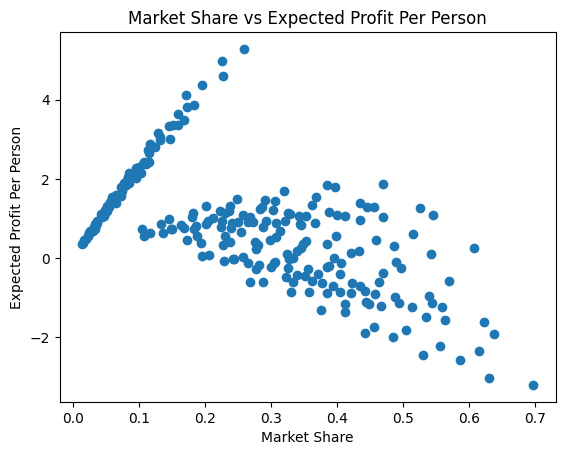

In [25]:
import matplotlib.pyplot as plt

plt.scatter(product_combinations_df['Market_Share'], product_combinations_df['Exp_Profit_Per_Person'])
plt.xlabel('Market Share')
plt.ylabel('Expected Profit Per Person')
plt.title('Market Share vs Expected Profit Per Person')
plt.show()
